Primero, análisis de los datos.

    1 Lectura del archivo csv

    2 Composición de la tabla (cuantos registros y tipo de datos ) 

    3 Ver un resumen de la tabla

Todo esto para porder comprender mejor los datos y poder hacer un análisis adecuado, además de limpiarlos de ser necesario

In [2]:
import pandas as pd

#abre el archivo para poder trabajar con el dataset
dataset = pd.read_csv("Covers.csv")

#ver cuantos registros tenemos y de que tipo son los datos
dataset.info()

#ver los primeros registros de la tabla para ver como estan compuesta

dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             919 non-null    object 
 1   Artist            919 non-null    object 
 2   Duration          919 non-null    object 
 3   Time_Signature    919 non-null    int64  
 4   Danceability      919 non-null    float64
 5   Energy            919 non-null    float64
 6   Key               919 non-null    int64  
 7   Loudness          919 non-null    float64
 8   Mode              919 non-null    int64  
 9   Speechiness       919 non-null    float64
 10  Acousticness      919 non-null    float64
 11  Instrumentalness  919 non-null    float64
 12  Liveness          919 non-null    float64
 13  Valence           919 non-null    float64
 14  Tempo             919 non-null    float64
 15  Popularity        919 non-null    int64  
 16  Year              919 non-null    int64  
dt

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
0,Everybody Everybody,Black Box,4:11,4,0.645,0.795,7,-12.095,1,0.0527,0.3470,0.003890,0.1040,0.535,112.067,87,1990
1,Close To You,Maxi Priest,3:45,4,0.590,0.727,6,-7.955,1,0.0706,0.0259,0.000065,0.0827,0.356,121.966,85,1990
2,Do Me!,Bell Biv DeVoe,3:56,4,0.615,0.534,9,-6.719,0,0.0386,0.1060,0.000018,0.0607,0.193,135.917,84,1990
3,Everything,Jody Watley,4:05,4,0.704,0.225,6,-14.454,0,0.0994,0.9020,0.657000,0.1060,0.243,120.006,82,1990
4,What It Takes,Aerosmith,3:21,4,0.672,0.655,10,-5.021,0,0.0310,0.0362,0.000000,0.1170,0.555,134.948,82,1990


Tipo de datos:

Track: cualitativa nominal.

Artist: cualitativa nominal.

Duration: cuantitativa continua.(ver si necesita alguna 
transformación) 

Time_signature: cuantitativa discreta.

Danceability: cuantitativa continua.

Energy: cuantitativa continua.

Key: cuantitativa discreta.

Loudness: cuantitativa continua.

Mode: cualitativa nominal. (ver si necesita alguna transformación)

Speechiness: cuantitativa continua.

Acousticness cuantitativa continua.

Instrumentalness: cuantitativa continua.(ver posible relacion entre 
instrumentalness,Acousticness y speechiness)

Liviness: cuantitativa continua.(ver como funciona)

Valence: cuantitativa continua.

Tempo: cuantitativa continua.

Popularity: cuantitativa discreta. (que son esas otras metricas que 
tiene en cuenta)

Year: cuantitativa discreta.(ver si es correcto decir que es discreta)

Posibles puntos de interés

    Relaciones entre
        Danceability - Energy - key - loudnes - tempo 
        Speechiness - acoustiness - instrumentalness
        Danceability - popularity
        Liveness - popularity
    Posibles análisis 
        ¿Si una canción es más adecuada para bailar, es más probable que sea popular?
        ¿Con qué se relaciona Livenesss?¿Como se calcula ese promedio?
        ¿Si Valence es alto, entonces aumenta popular?¿Cómo se relaciona con la danceability?
        ¿Cuanto duran las canciones en promedio?¿afecta o esta relacionada con alguna otra variable?
        ¿Cuales son más polulares, las canciones que son más instrumentales o las que son más habladas? ¿que tipo es el más común?
        ¿Qué artista es más popular?¿se puede relacionar el resultado a alguna de las preguntas anteriores?(por ejemplo el artita más popular tiene más temas adecuados para bailar)
        ¿Cómo se relaciona el tempo con la danceability?
        ....




limpieza de los datos 

In [3]:
# ver si tenemos valores nulos
dataset.isna().sum()

Track               0
Artist              0
Duration            0
Time_Signature      0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Popularity          0
Year                0
dtype: int64

    Control de valores que no son necesariamente nan

In [4]:
#imprimir la frecuencias absolutas de cada valor de las columnas

dataset["Instrumentalness"].value_counts().sort_index()

Instrumentalness
0.000000    375
0.000001      1
0.000001      1
0.000001      2
0.000001      1
           ... 
0.935000      1
0.958000      1
0.963000      1
0.972000      1
0.987000      1
Name: count, Length: 489, dtype: int64

    Control de valores que son String y pueden ser Unknown o algo similar

In [5]:
# la siguiente sentencia se repitio para cada columna de tipo String del dataset
for idx, val in dataset ["Track"].value_counts().items():
    print(idx,val)


Hold On 3
I’ll Be There 2
Crazy 2
Always 2
Everything 2
Lately 2
Alright 2
Stay 2
Angel 2
Anything 2
Rhythm Is A Dancer 2
Show Me Love 2
Someday 2
Again 2
Dangerous 2
I’m The Only One 2
Believe 2
Roll To Me 2
Nobody 2
Where Do You Go 2
How Do I Live 2
I’ll Be 2
My Body 2
The One I Gave My Heart To 2
Butta Love 2
I Don’t Want To Miss A Thing 2
Unchained Melody 1
We Didn’t Start The Fire 1
Just A Friend 1
Swing The Mood 1
The Power 1
Come Back To Me 1
Nothing Compares 2 U 1
Without You 1
Can’t Stop 1
Black Velvet 1
U Can’t Touch This 1
Step 1
Ice Ice Baby 1
How Am I Supposed To Live Without You 1
Pump Up The Jam 1
Pray 1
Ready Or Not 1
I Remember You 1
Jerk Out 1
Vogue 1
All I Wanna Do Is Make Love To You 1
Do You Remember 1
Epic 1
Black Cat 1
I Wish It Would Rain Down 1
All Around The World 1
King Of Wishful Thinking 1
No More Lies 1
Blaze Of Glory 1
The Humpty Dance 1
Don’t Wanna Fall In Love 1
Just Like Jesse James 1
Romeo 1
Something Happened On The Way To Heaven 1
Unskinny Bop 1
I D

    Control de duplicados

In [6]:
# copia el dataset para trabajar sobre la copia y no modificar el original 
copi_dataset = dataset.copy()
copi_dataset.duplicated().sum()

np.int64(0)

    Se puede ver que no hay líneas que estén totalmente duplicadas, pero con un análisis más profundo encontramos que varios valores estaban repetidos, exceptuando el nombre del artista o el año en que se lanzó el tema.

In [7]:
#usamos el siguiente codigo para ver el caso de los titulos de las canciones duplicadas 
#para luego analizar si es correcto 
copi_dataset[copi_dataset.duplicated(subset=['Track'],keep=False)].sort_values('Track')

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
397,Again,Janet Jackson,3:13,4,0.664,0.738,9,-4.095,0,0.0338,0.188000,0.000058,0.1350,0.2030,119.973,76,1994
300,Again,Janet Jackson,3:13,4,0.664,0.738,9,-4.095,0,0.0338,0.188000,0.000058,0.1350,0.2030,119.973,76,1993
5,Alright,Janet Jackson,3:39,4,0.796,0.766,7,-5.974,1,0.2380,0.074200,0.000000,0.0827,0.5580,110.034,80,1990
296,Alright,Kris Kross,3:39,4,0.796,0.766,7,-5.974,1,0.2380,0.074200,0.000000,0.0827,0.5580,110.034,80,1993
394,Always,Bon Jovi,3:43,4,0.174,0.742,8,-5.930,1,0.0485,0.001810,0.281000,0.1980,0.3600,163.378,78,1994
395,Always,Erasure,3:43,4,0.174,0.742,8,-5.930,1,0.0485,0.001810,0.281000,0.1980,0.3600,163.378,78,1994
303,Angel,Jon Secada,3:55,4,0.740,0.766,6,-2.939,1,0.1780,0.116000,0.000000,0.0406,0.8070,170.531,75,1993
841,Angel,Sarah McLachlan,3:55,4,0.740,0.766,6,-2.939,1,0.1780,0.116000,0.000000,0.0406,0.8070,170.531,75,1999
575,Anything,3T,3:22,4,0.388,0.291,3,-12.952,1,0.0421,0.774000,0.000019,0.0874,0.5100,83.943,76,1996
399,Anything,SWV,3:22,4,0.388,0.291,3,-12.952,1,0.0421,0.774000,0.000019,0.0874,0.5100,83.943,76,1994


    Después de analizar y discutir el contenido de la tabla anterior, se tomó la decisión de eliminar aquellos elementos que tienen repetido todo, excepto el año de lanzamiento, y mantener el resto de los datos. Se utiliza subset sobre Track y Artist ya que podría haber 2 temas de distintos artistas con el mismo nombre, pero es altamente improbable que un artista lance 2 canciones tituladas igual.

In [7]:
#visualizamos aquellos elementos que tenemos duplicados
#subset permite especificar las columnas que nos interesa buscar duplicados
copi_dataset[copi_dataset.duplicated(subset=['Track','Artist'],keep=False)].sort_values(by ='Track')

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
300,Again,Janet Jackson,3:13,4,0.664,0.738,9,-4.095,0,0.0338,0.188000,0.000058,0.1350,0.2030,119.973,76,1993
397,Again,Janet Jackson,3:13,4,0.664,0.738,9,-4.095,0,0.0338,0.188000,0.000058,0.1350,0.2030,119.973,76,1994
792,Butta Love,Next,4:56,4,0.735,0.441,1,-8.412,0,0.0407,0.097200,0.000000,0.0967,0.5910,108.015,50,1998
700,Butta Love,Next,4:56,4,0.735,0.441,1,-8.412,0,0.0407,0.097200,0.000000,0.0967,0.5910,108.015,50,1997
764,How Do I Live,LeAnn Rimes,4:26,4,0.577,0.462,2,-7.989,1,0.0279,0.128000,0.000000,0.0822,0.2580,128.303,67,1998
671,How Do I Live,LeAnn Rimes,4:26,4,0.577,0.462,2,-7.989,1,0.0279,0.128000,0.000000,0.0822,0.2580,128.303,67,1997
463,I’m The Only One,Melissa Etheridge,3:43,4,0.715,0.518,5,-7.108,1,0.0459,0.528000,0.000000,0.0732,0.5560,82.076,48,1994
548,I’m The Only One,Melissa Etheridge,3:43,4,0.715,0.518,5,-7.108,1,0.0459,0.528000,0.000000,0.0732,0.5560,82.076,48,1995
784,My Body,LSG,4:04,4,0.486,0.900,10,-6.482,1,0.0768,0.000573,0.000314,0.5710,0.5330,130.000,58,1998
688,My Body,LSG,4:04,4,0.486,0.900,10,-6.482,1,0.0768,0.000573,0.000314,0.5710,0.5330,130.000,58,1997


In [8]:
#eliminamos los elementos duplicados
copi_dataset.drop_duplicates(subset=['Track','Artist'], keep="first",inplace=True)
#contamos los duplicados
copi_dataset.duplicated(subset=['Track','Artist']).sum()

np.int64(0)

    Transformación de la duración a segundos

In [9]:
# pasaje de minutos a segundos 
copi_dataset['Duration'] = copi_dataset['Duration'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))

# Confirmar el cambio de tipo a integer
copi_dataset['Duration'] = copi_dataset['Duration'].astype(int)

copi_dataset.head()

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
0,Everybody Everybody,Black Box,251,4,0.645,0.795,7,-12.095,1,0.0527,0.3470,0.003890,0.1040,0.535,112.067,87,1990
1,Close To You,Maxi Priest,225,4,0.590,0.727,6,-7.955,1,0.0706,0.0259,0.000065,0.0827,0.356,121.966,85,1990
2,Do Me!,Bell Biv DeVoe,236,4,0.615,0.534,9,-6.719,0,0.0386,0.1060,0.000018,0.0607,0.193,135.917,84,1990
3,Everything,Jody Watley,245,4,0.704,0.225,6,-14.454,0,0.0994,0.9020,0.657000,0.1060,0.243,120.006,82,1990
4,What It Takes,Aerosmith,201,4,0.672,0.655,10,-5.021,0,0.0310,0.0362,0.000000,0.1170,0.555,134.948,82,1990


 $Analisis$ $Univariado$

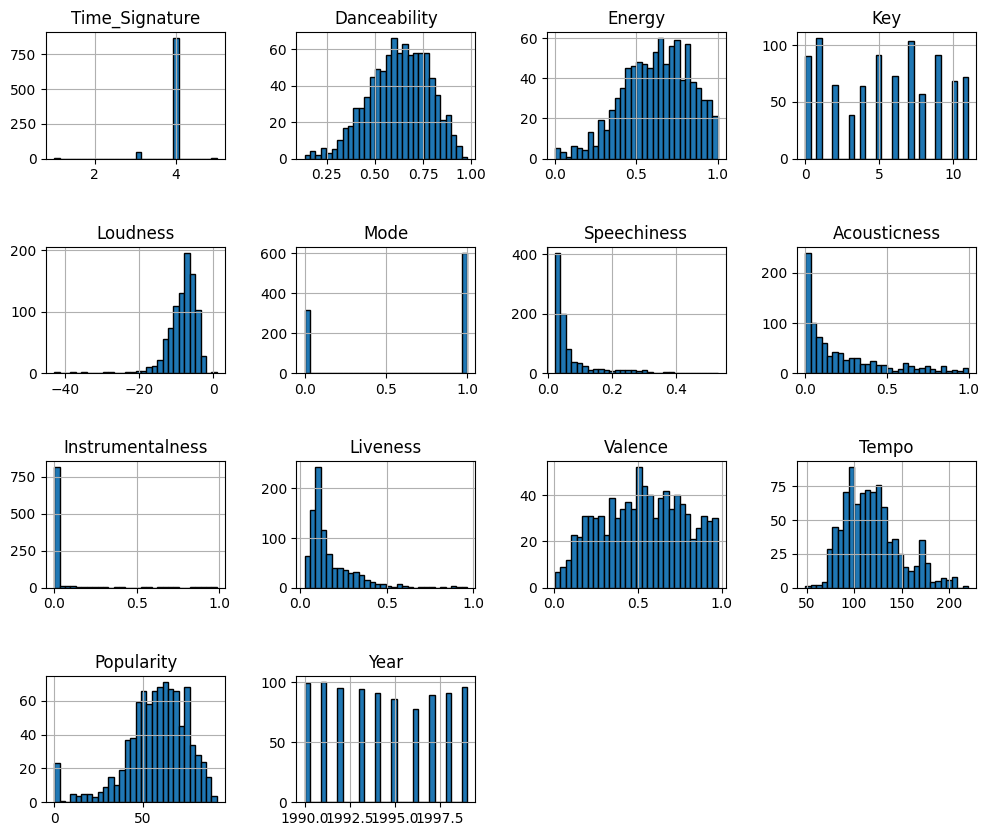

In [13]:
import matplotlib.pyplot as plt
copi_dataset.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

    popularidad

In [54]:
copi_dataset["Popularity"] = copi_dataset["Popularity"]/100

In [55]:
copi_dataset["Popularity"].describe()

count    910.000000
mean       0.577011
std        0.176617
min        0.000000
25%        0.490000
50%        0.600000
75%        0.700000
max        0.920000
Name: Popularity, dtype: float64

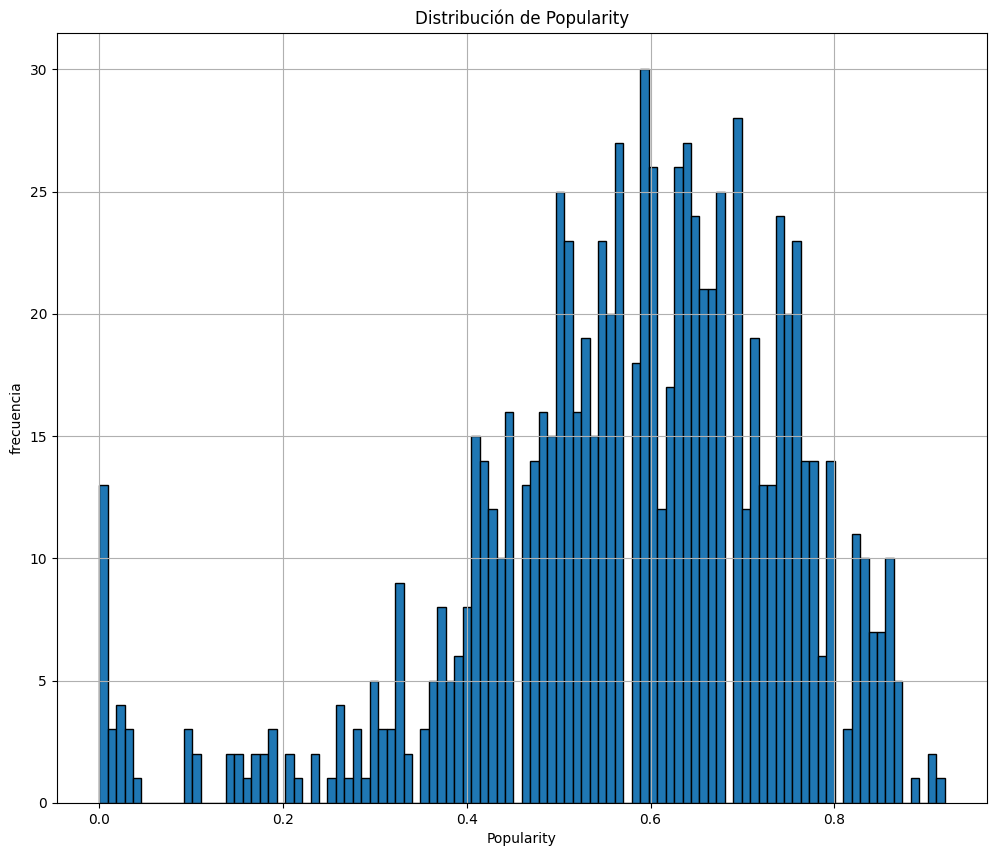

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))  
plt.hist(copi_dataset['Popularity'], bins=100, edgecolor='black')  
plt.title('Distribución de Popularity')
plt.xlabel('Popularity')
plt.ylabel('frecuencia')
plt.grid(True)
plt.show()

    Podemos observar que, ademas de presentar un sesgo hacia la izquierda, el gráfico muestra un comportamiento peculiar que nos llevó a considerar que podrìa tratarse de una variable cuantitativa,pensamos tambien la opcion de pasar a una variable categorica, pero a la hora de analizar la correlacion vimos que perdiamos bastante informacion entonces decidimos dejarla como cuantitativa.
    (dada la falta de información de como se calcula la popularidad de las canciones, no pudimos tomar una decisión de como dividirla correctamente )

$Análisis$ $bivariado$

In [57]:
# calculamos las correlaciones e imprimimos la matriz
# select_dtypes se utiliza para filtrar las variables que son numericas
mat_correlacion = copi_dataset.select_dtypes(include=[float,int]).corr()
mat_correlacion

,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
Duration,1.000000,0.009518,-0.012975,-0.014764,0.026174,-0.024213,-0.003233,-0.088009,-0.099217,-0.105426,-0.011027,-0.090955,-0.066935,-0.118296,-0.044348
Time_Signature,0.009518,1.000000,0.194912,0.229424,0.035511,0.126690,-0.072081,0.090995,-0.183237,0.001103,0.019426,0.204565,-0.015919,-0.007822,-0.012147
Danceability,-0.012975,0.194912,1.000000,0.140257,0.016792,0.141364,-0.218203,0.268113,-0.252445,-0.126875,-0.082126,0.478596,-0.146189,-0.027912,0.051474
Energy,-0.014764,0.229424,0.140257,1.000000,0.018466,0.657293,-0.127141,0.118698,-0.649583,-0.140190,0.197854,0.427870,0.147885,0.018567,-0.028838
Key,0.026174,0.035511,0.016792,0.018466,1.000000,0.019366,-0.153208,0.017439,-0.018057,-0.010902,0.000039,-0.011587,-0.039969,0.011212,-0.016304
Loudness,-0.024213,0.126690,0.141364,0.657293,0.019366,1.000000,-0.118614,0.054553,-0.463153,-0.401526,0.097662,0.208565,0.120203,0.088767,0.127643
Mode,-0.003233,-0.072081,-0.218203,-0.127141,-0.153208,-0.118614,1.000000,-0.130951,0.132504,0.033605,-0.008099,-0.082367,-0.005551,-0.015303,-0.017800
Speechiness,-0.088009,0.090995,0.268113,0.118698,0.017439,0.054553,-0.130951,1.000000,-0.112050,-0.059161,0.087626,0.135665,0.121391,-0.027856,0.085070
Acousticness,-0.099217,-0.183237,-0.252445,-0.649583,-0.018057,-0.463153,0.132504,-0.112050,1.000000,0.188109,-0.090343,-0.298312,-0.127629,-0.033700,0.009897
Instrumentalness,-0.105426,0.001103,-0.126875,-0.140190,-0.010902,-0.401526,0.033605,-0.059161,0.188109,1.000000,-0.055699,-0.127150,-0.002352,-0.136845,-0.057255


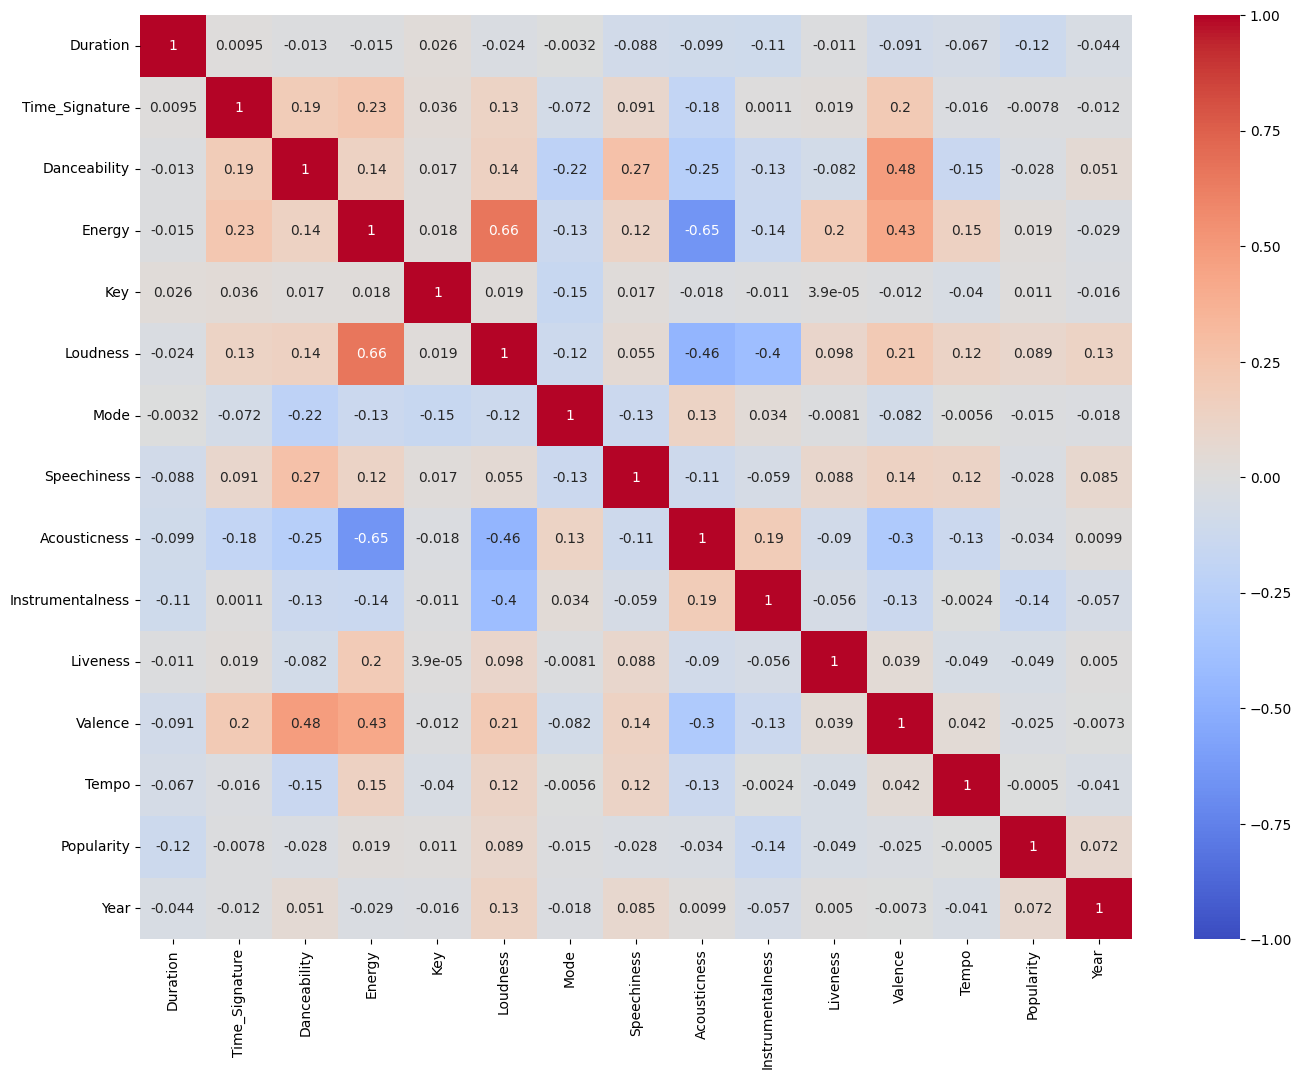

In [58]:
#para ver mas facilmente las correlaciones
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,12))
sns.heatmap(mat_correlacion, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

    Podemos observar que no existen relaciones con un valor de correlación superior a 0.7 o inferior a -0.7, por lo que podemos suponer que no hay una relación lineal fuerte entre las características que estamos estudiando.

    Aun así, podemos analizar la relación entre energy-loudness y energy-acousticness, ya que presentan valores de correlación cercanos a 0.7

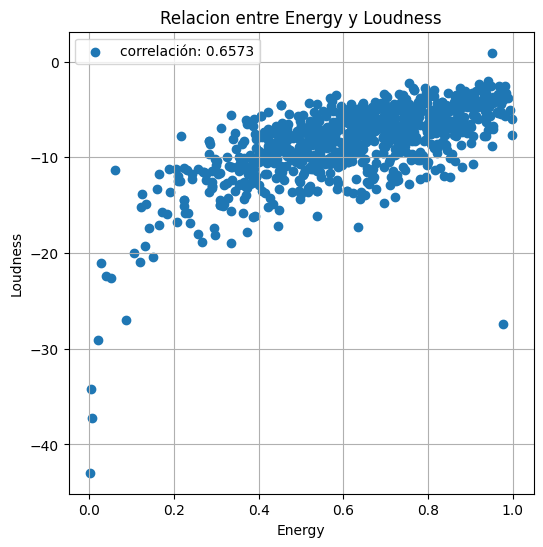

In [59]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

plt.figure(figsize=(6,6))
plt.scatter(copi_dataset['Energy'], copi_dataset['Loudness'])
plt.xlabel("Energy")
plt.ylabel("Loudness")
plt.title("Relacion entre Energy y Loudness")

coeficiente_correlacion, _ =  stats.pearsonr(copi_dataset['Energy'],copi_dataset['Loudness'])
plt.legend([f"correlación: {coeficiente_correlacion:.4f}"], loc="upper left")

plt.grid(True)
plt.show()

    Como se puede observar en el gráfico de dispersión, la relación entre energy y loudness muestra una mayor relación lineal de lo que aparentaba según el valor de correlación, el cual parece estar influenciado por algunos valores específicos

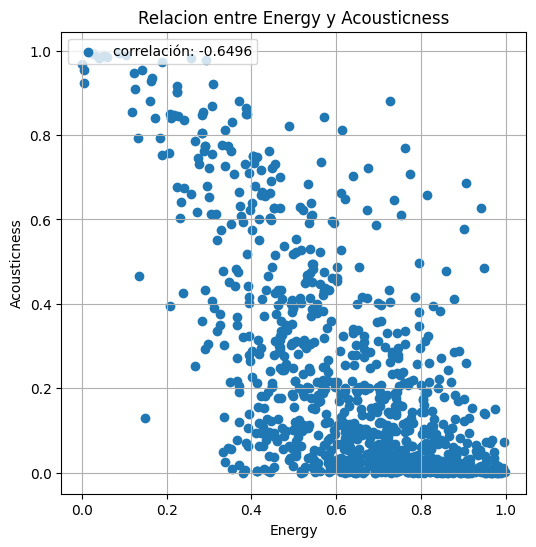

In [60]:

plt.figure(figsize=(6,6))
plt.scatter(copi_dataset['Energy'], copi_dataset['Acousticness'])
plt.xlabel("Energy")
plt.ylabel("Acousticness")
plt.title("Relacion entre Energy y Acousticness")

coeficiente_correlacion, _ =  stats.pearsonr(copi_dataset['Energy'],copi_dataset['Acousticness'])
plt.legend([f"correlación: {coeficiente_correlacion:.4f}"], loc="upper left")

plt.grid(True)
plt.show()

    En este caso, podemos decir que el valor de correlación parece representar adecuadamente el gráfico de dispersión obtenido. Sin embargo, esto no implica que no exista una relación entre las dos variables, ya que acousticness disminuye a medida que energy aumenta. Es posible que la razón por la cual la correlación es mayor a -0.7 sea que la relación no es completamente lineal

$Reducción$ $de$ $dimensionalidad$

    este apartado lo use para analizar si energy tiene una relación con las otras variables que no necesariamente debe ser lineal, al igual que la popularidad

    análisis de energy

In [14]:
#preprocesado
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#sacamos Energy que es la que vamos a analizar y Mode que es dicotomica
data_redux = copi_dataset.drop(['Energy','Mode','Artist','Track'], axis=1)

#estandarizamos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_redux)



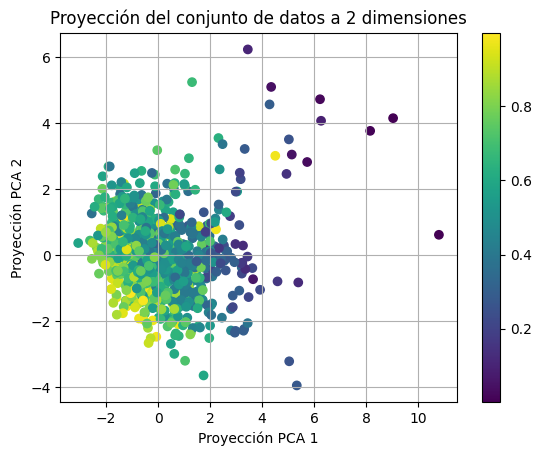

In [15]:
# ojo ejecutar el codigo anterior que acomoda los datos
from sklearn.decomposition import PCA
#aplicamos PCA a los datos
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(data_scaled)

#graficar
plt.scatter(X_pca[:,0], X_pca[:,1], c=copi_dataset["Energy"], cmap='viridis')
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.colorbar()
plt.show()

Observaciones 
    
    -podemos ver una evolución de derecha a izquierda 
    
    -No se ven grupos distintos (por lo menos no se si tomar como grupo los valores que están dispersos cuando la energy es baja)
    
    -para valores bajos de energy, se ve una dispersión mas grande (puede que sea por el sesgo que posee la variable energy )    

Before T_SNE: (919, 13)
After T_SNE: (919, 2)


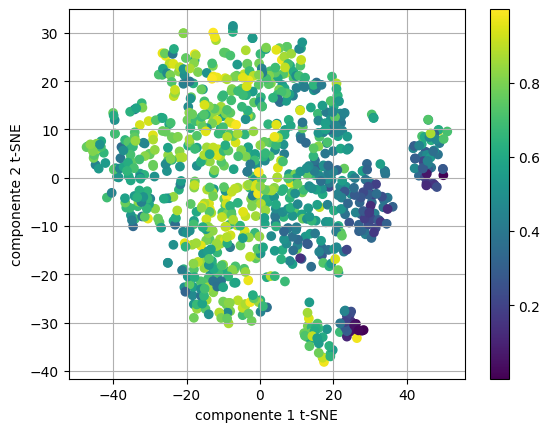

In [16]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=10).fit_transform(data_scaled)
print('Before T_SNE: {}'.format(data_scaled.shape))
print('After T_SNE: {}'.format(tsne.shape))

#graficamos
plt.scatter(tsne[:,0], tsne[:,1], c=copi_dataset["Energy"], cmap='viridis')
plt.grid(True)
plt.xlabel('componente 1 t-SNE')
plt.ylabel('componente 2 t-SNE')
plt.colorbar()
plt.show()

    Aquí podemos observar que se sigue viendo una evolución de derecha a izquierda, además de ser ascendente (a diferencia del gráfico anterior).

    También podemos distingir tres o cuatro grupos distintos

popularidad

In [18]:
data_redux = copi_dataset.drop(['Popularity','Mode','Artist','Track'], axis=1)

#estandarizamos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_redux)


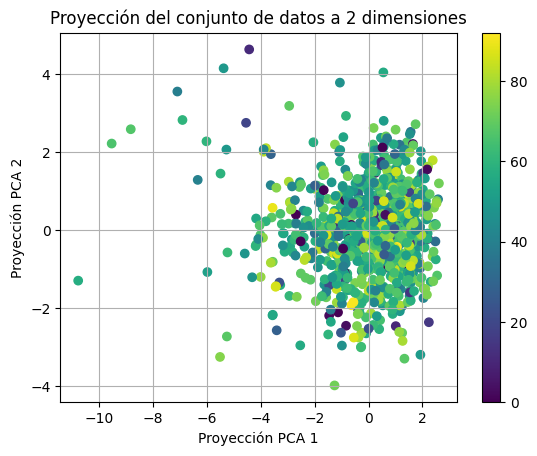

In [19]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(data_scaled)

#graficar
plt.scatter(X_pca[:,0], X_pca[:,1], c=copi_dataset["Popularity"], cmap='viridis')
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.colorbar()
plt.show()

    Claramente, en el gráfico no se puede observar un comportamiento especial para la popularidad, lo que nos permite pensar que no tiene relación con el resto de las variables.

Before T_SNE: (919, 13)
After T_SNE: (919, 2)


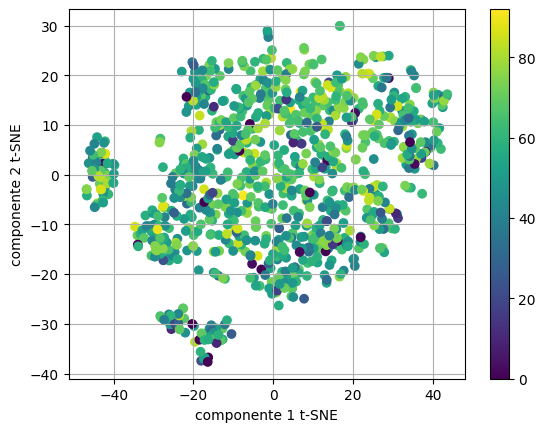

In [20]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=10).fit_transform(data_scaled)
print('Before T_SNE: {}'.format(data_scaled.shape))
print('After T_SNE: {}'.format(tsne.shape))

#graficamos
plt.scatter(tsne[:,0], tsne[:,1], c=copi_dataset["Popularity"], cmap='viridis')
plt.grid(True)
plt.xlabel('componente 1 t-SNE')
plt.ylabel('componente 2 t-SNE')
plt.colorbar()
plt.show()

    Visto esto podemos decir que la popularidad no posee relación con el resto de las variables 

$Clúster$

In [21]:
#tranformacion de MODE a 1 o 0
copi_dataset['Mode'] = copi_dataset['Mode'].apply(lambda x: 1 if x == True else 0)

In [22]:
#normalizacion de los datos
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

numeric_cols = copi_dataset.select_dtypes(include=np.number).columns
scaler = MinMaxScaler()
copi_dataset[numeric_cols] = scaler.fit_transform(copi_dataset[numeric_cols])

titulos = copi_dataset['Track']
feature_copi_dataset = copi_dataset.drop(columns=['Artist','Track','Year'])

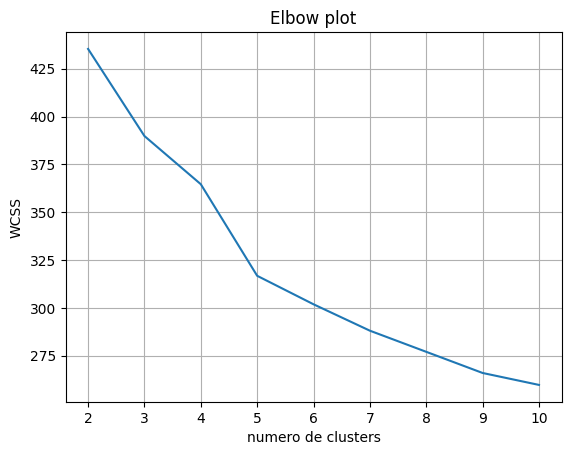

In [23]:
#Elbow plot para seleccionar un k "adecuado" para hacer K-Means
from sklearn.cluster import KMeans

wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(feature_copi_dataset)
    wcss.append(kmeans.inertia_)

plt.plot(range(2,11), wcss)
plt.title('Elbow plot')
plt.grid("True")
plt.xlabel('numero de clusters')
plt.ylabel('WCSS')
plt.show()

    Viendo el grafico podríamos optar por tomar un k=3, k=5 o k=8 para probarlo en el K-Mean.

In [24]:
#aplicamos K-Means

kmeans = KMeans(n_clusters=3, verbose=0, random_state=10)
kmeans.fit(feature_copi_dataset)
#cluster formados con k dado
clusters_kmeans = kmeans.predict(feature_copi_dataset)

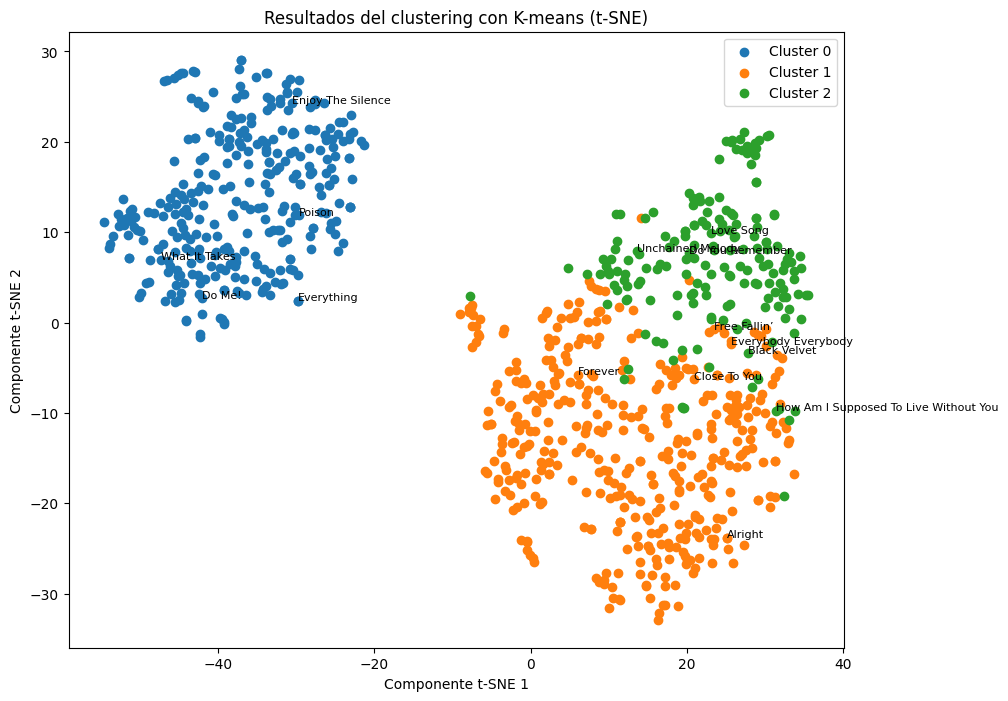

In [72]:
#scater para poder ver los cluster
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

#reducir la dimensionalidad
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(feature_copi_dataset)

#crear dataframe con los resultados t-sne y clusters
tsne_df = pd.DataFrame({'x': tsne_results[:,0], 'y': tsne_results[:,1], 'Cluster': clusters_kmeans, 'Track': titulos})

# Graficar los resultados de t-SNE, coloreando los puntos según el cluster
plt.figure(figsize=(10, 8))
for cluster_num in range(3):
  plt.scatter(tsne_df[tsne_df['Cluster'] == cluster_num]['x'], tsne_df[tsne_df['Cluster'] == cluster_num]['y'], label=f'Cluster {cluster_num}')
  titulos_to_label = tsne_df[tsne_df['Cluster'] == cluster_num]['Track'].tolist()
  titulos_to_label = titulos_to_label[:5]

  for country in titulos_to_label:
      row = tsne_df[(tsne_df['Cluster'] == cluster_num) & (tsne_df['Track'] == country)]
      if not row.empty:
        plt.text(row['x'].values[0], row['y'].values[0], country, fontsize=8)




plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.title('Resultados del clustering con K-means (t-SNE)')
plt.legend()
plt.show()


In [73]:
import pandas as pd

# Creamos un DataFrame con los titulos y los clusters asignados
cluster_df = pd.DataFrame({'Track': titulos, 'Cluster': clusters_kmeans})

# Imprimimos los titulos de cada cluster
for cluster_num in range(3):
  print(f"\nCluster {cluster_num}:")
  print(cluster_df[cluster_df['Cluster'] == cluster_num]['Track'].tolist())


Cluster 0:
['Do Me!', 'Everything', 'What It Takes', 'Poison', 'Enjoy The Silence', 'Another Day In Paradise', 'Just A Friend', 'Swing The Mood', 'Come Back To Me', 'U Can’t Touch This', 'Hold On', 'Hold On', 'Step', 'Pump Up The Jam', 'Pray', 'Jerk Out', 'Epic', 'Black Cat', 'All Around The World', 'No More Lies', 'The Humpty Dance', 'Don’t Wanna Fall In Love', 'Romeo', 'Something Happened On The Way To Heaven', 'Get Up! (BEFORE The Night Is Over)', 'How Can We Be Lovers', 'What Kind Of Man Would I Be?', 'All Or Nothing', 'Don’t Know Much', 'Blame It On The Rain', 'Whip Appeal', 'Thieves In The Temple', 'Two To Make It Right', 'Giving You The Benefit', 'Make You Sweat (#14)', 'She Ain’t Worth It', 'Girls Nite Out', 'I’ll Be Your Everything', 'Baby Baby', 'Losing My Religion', 'The First Time', 'Joyride', 'Rush Rush', 'Crazy', 'Enter Sandman', 'Summertime', 'Good Vibrations', 'Something To Talk About', 'Temptation', 'O.P.P.', 'I Wanna Sex You Up', 'Here I Am (COME And Take Me)', 'Love

clustering jerarquico

In [74]:
from scipy.cluster.hierarchy import dendrogram, linkage

# generamos el clustering jerárquico
linked = linkage(feature_copi_dataset, method='single')

# ploteamos el dendrograma
plt.figure(figsize=(200,40))
dendrogram(linked,
           orientation='top',
           labels=list(titulos), # oko que hay que pasarle una lista
           distance_sort='descending',
           show_leaf_counts=True,
           leaf_font_size=10)
plt.xlabel('Track')
plt.ylabel('Euclidean Distance')
plt.show()

In [75]:
from sklearn.cluster import AgglomerativeClustering

# creamos el objeto para el clustering aglomerativo, eliminamos affinity porque no es necesario con linkage='single'
agglomerative = AgglomerativeClustering(n_clusters=3, linkage='single')
# usamos fit predict para buscar los clusters y devolverlos
clusters_agglomerative = agglomerative.fit_predict(feature_copi_dataset)

# imprimimos por pantalla los nombres de los países asignados a cada cluster
for k in np.unique(clusters_agglomerative):
  print('Cluster {}'.format(k))
  print(titulos[clusters_agglomerative==k])
  print('======')

Cluster 0
0       Everybody Everybody
1              Close To You
5                   Alright
6                 Love Song
9              Free Fallin’
               ...         
907           Take Me There
909          Give It To You
910    She’s All I Ever Had
911       Music Of My Heart
914          I’m Your Angel
Name: Track, Length: 595, dtype: object
Cluster 1
2                       Do Me!
3                   Everything
4                What It Takes
7                       Poison
8            Enjoy The Silence
                ...           
913                 No Pigeons
915          Taking Everything
916       What’s It Gonna Be?!
917       Almost Doesn’t Count
918    It Ain’t My Fault 1 & 2
Name: Track, Length: 314, dtype: object
Cluster 2
563    I’d Lie For You (AND That’s The Truth)
Name: Track, dtype: object


$Evaluación$ $de$ $soluciones$

K-means
DB score: 1.6320
Silhouette score: 0.2508
----------
Hierarchical Clustering
DB score: 1.0584
Silhouette score: 0.2791
----------


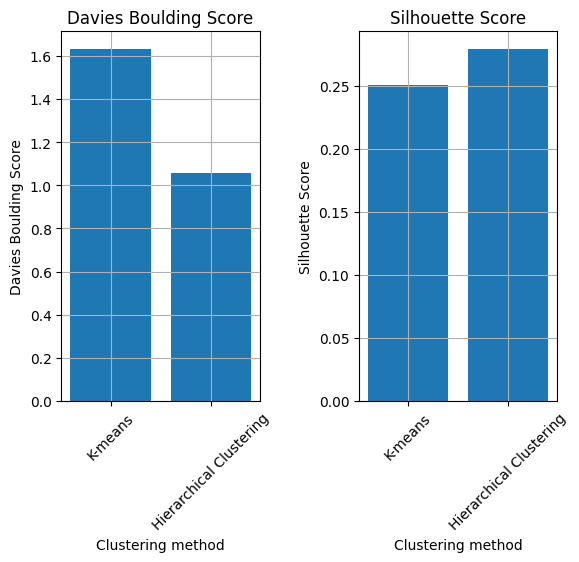

In [76]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

# inicializamos listas con los resultados de cada algoritmo y los nombres de los
# algoritmos
clusters_to_compare = [clusters_kmeans, clusters_agglomerative]
clustering_methods = ['K-means', 'Hierarchical Clustering']

# inicializamos vectores donde iremos guardando los resultados
db_scores = np.zeros(len(clusters_to_compare))
silhouette_scores = np.zeros(len(clusters_to_compare))

# por cada uno de los métodos
for i in range(len(clusters_to_compare)):
  # calculamos las métricas
  db_scores[i] = davies_bouldin_score(feature_copi_dataset, clusters_to_compare[i])
  silhouette_scores[i] = silhouette_score(feature_copi_dataset, clusters_to_compare[i])
  # las imprimimos
  print(clustering_methods[i])
  print('DB score: {:.4f}'.format(db_scores[i]))
  print('Silhouette score: {:.4f}'.format(silhouette_scores[i]))
  print('----------')

# inicializamos un gráfico para cada métrica
fig, axes = plt.subplots(1, 2)
plt.subplots_adjust(wspace=0.5)
# graficamos el Davies Bouldin score
axes[0].bar(np.arange(db_scores.size), db_scores)
axes[0].set_title('Davies Boulding Score')
axes[0].set_xlabel('Clustering method')
axes[0].set_ylabel('Davies Boulding Score')
axes[0].set_xticks(np.arange(db_scores.size))
axes[0].set_xticklabels(clustering_methods, rotation=45)
axes[0].grid(True)
# y el Silhouette Score
axes[1].bar(np.arange(silhouette_scores.size), silhouette_scores)
axes[1].set_title('Silhouette Score')
axes[1].set_xlabel('Clustering method')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_xticks(np.arange(silhouette_scores.size))
axes[1].set_xticklabels(clustering_methods, rotation=45)
axes[1].grid(True)

plt.show()

H1 ¿las canciones que son de modalidad mayor tienen una energía más fuerte?

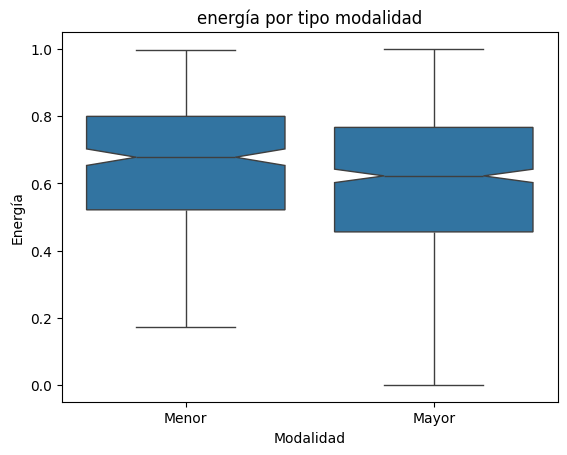

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Mode', y='Energy', data = copi_dataset, notch=True)
plt.title("energía por tipo modalidad")
plt.xlabel("Modalidad")
plt.xticks(ticks=[0, 1], labels=["Menor", "Mayor"])
plt.ylabel("Energía")
plt.show()

    Probamos normalidad (shapiro)

In [4]:
from scipy.stats import shapiro
#Separamos los datos en dos grupos, modalidad alta y baja
alta_energy = copi_dataset[copi_dataset['Mode'] == 1]['Energy']
baja_energy = copi_dataset[copi_dataset['Mode'] == 0]['Energy']

# Test de Shapiro-Wilk para modalidad de las cancioes
stat, p = shapiro(alta_energy)
print(f"Test de Shapiro-Wilk para modalidad alta: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para la modalidad de las canciones
stat, p = shapiro(baja_energy)
print(f"Test de Shapiro-Wilk para modalidad baja: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para modalidad alta: Estadístico=0.981, p-valor=0.000
Test de Shapiro-Wilk para modalidad baja: Estadístico=0.982, p-valor=0.001


    Vemos la normalidad en el QQ-plot

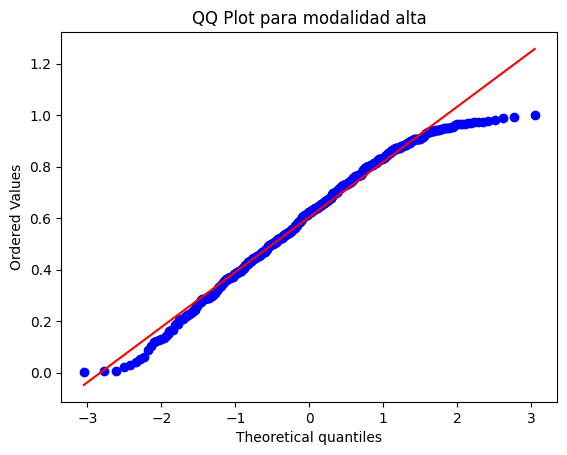

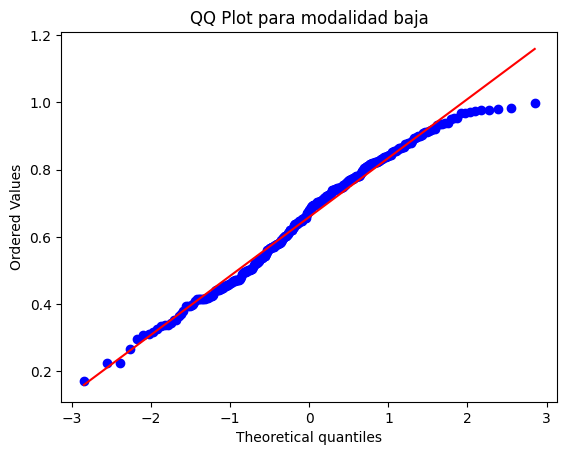

In [5]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# QQ plot para modalidad alta
stats.probplot(alta_energy, dist="norm", plot=plt)
plt.title("QQ Plot para modalidad alta")
plt.show()

# QQ plot para modalidad baja
stats.probplot(baja_energy, dist="norm", plot=plt)
plt.title("QQ Plot para modalidad baja")
plt.show()

    Probamos homocedasticidad (levene)

In [79]:
stat, p = stats.levene(alta_energy, baja_energy)
print(f"Test de Levene para energia: Estadístico={stat:.3f}, p-valor={p:.3f}")


Test de Levene para energia: Estadístico=12.022, p-valor=0.001


    Validamos h por Kruskal-wallis

In [80]:
# Test de Kruskal-Wallis para comparar la energía entre las modalidades de las canciones
stat, p = stats.kruskal(alta_energy, baja_energy)
print(f"Test de Kruskal-Wallis para energia: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en la energia entre países la modalidad mayor y menor.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en la energia entre la modalidad mayor y menor.")

Test de Kruskal-Wallis para energia: Estadístico=11.327, p-valor=0.001
Se rechaza la hipótesis nula.
Existe una diferencia significativa en la energia entre la modalidad mayor y menor.


    Dado el resultado y viendo el boxplot podríamos decir que la energía en modalidad baja tiene mayor energía que una de modalidad alta

H2: ¿La popularidad entre las dos modalidades son iguales?

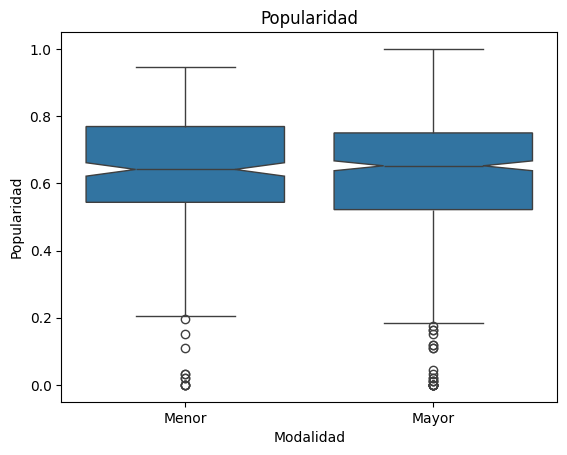

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Mode', y='Popularity', data = copi_dataset, notch=True)
plt.title("Popularidad")
plt.xlabel("Modalidad")
plt.xticks(ticks=[0, 1], labels=["Menor", "Mayor"])
plt.ylabel("Popularidad")
plt.show()

In [6]:
from scipy.stats import shapiro
#Separamos los datos en dos grupos, modalidad mayor y menor
mayor_popularity = copi_dataset[copi_dataset['Mode'] == 1]['Popularity']
menor_popularity = copi_dataset[copi_dataset['Mode'] == 0]['Popularity']

# Test de Shapiro-Wilk para modalidad de las canciones
stat, p = shapiro(mayor_popularity)
print(f"Test de Shapiro-Wilk para modalidad alta: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para modalidad de las canciones
stat, p = shapiro(menor_popularity)
print(f"Test de Shapiro-Wilk para modalidad baja: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para modalidad alta: Estadístico=0.938, p-valor=0.000
Test de Shapiro-Wilk para modalidad baja: Estadístico=0.938, p-valor=0.000


    Vemos la normalidad con el QQ-plot

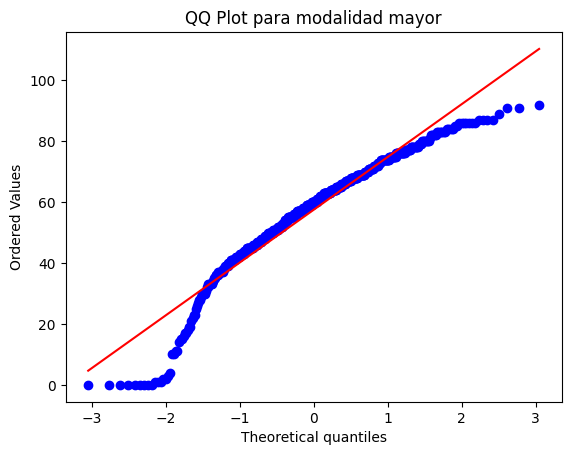

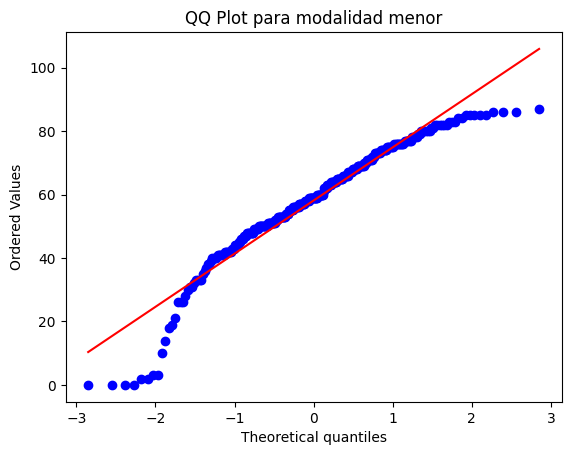

In [7]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# QQ plot para modalidad mayor
stats.probplot(mayor_popularity, dist="norm", plot=plt)
plt.title("QQ Plot para modalidad mayor")
plt.show()

# QQ plot para modalidad menor
stats.probplot(menor_popularity, dist="norm", plot=plt)
plt.title("QQ Plot para modalidad menor")
plt.show()

In [83]:
stat, p = stats.levene(mayor_popularity, menor_popularity)
print(f"Test de Levene para pupularidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para pupularidad: Estadístico=0.320, p-valor=0.572


In [84]:
# Test de Mann-Whitney U para comparar popularidad entre las modalidades bajas y altas
stat, p = stats.mannwhitneyu(mayor_popularity, menor_popularity)
print(f"Test de Mann-Whitney U para popularidad: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en la popularidad de las canciones con modalidad alta y baja.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en la popularidad de las canciones con modadlidad alta y baja.")

Test de Mann-Whitney U para popularidad: Estadístico=92746.500, p-valor=0.827
No hay suficiente evidencia para rechazar la hipótesis nula.
No hay una diferencia significativa en la popularidad de las canciones con modalidad alta y baja.


    H5 las canciones del cluster 1 tienen un loudness mayor que las del cluster 2 

In [25]:
# Como queremos estudiar la diferencia entre los cluster agregamos la columna Cluster y la completamos con los datos ya calculados
h3_data = copi_dataset.copy()
h3_data['Cluster'] = clusters_kmeans 

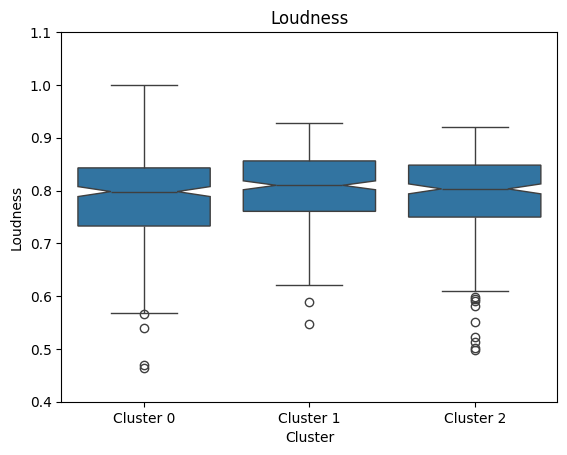

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Cluster', y='Loudness', data = h3_data, notch=True)
plt.title("Loudness")
plt.xlabel("Cluster")
plt.xticks(ticks=[0, 1, 2], labels=["Cluster 0", "Cluster 1", "Cluster 2"])
plt.ylim([0.4, 1.1])
plt.ylabel("Loudness")
plt.show()

    Se puede ver una diferencia entre las medianas entre el cluster 1 y el cluster 2

In [27]:
from scipy.stats import shapiro
#Separamos los datos en dos grupos, cluster 1 y 2
cluster1_loudness = copi_dataset[h3_data['Cluster'] == 1]['Loudness']
cluster2_loudness = copi_dataset[h3_data['Cluster'] == 2]['Loudness']

# Test de Shapiro-Wilk para los clusters
stat, p = shapiro(cluster1_loudness)
print(f"Test de Shapiro-Wilk para cluster 1: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para modalidad de las canciones
stat, p = shapiro(cluster2_loudness)
print(f"Test de Shapiro-Wilk para cluster 2: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para cluster 1: Estadístico=0.933, p-valor=0.000
Test de Shapiro-Wilk para cluster 2: Estadístico=0.738, p-valor=0.000


    Vemos el QQ-plot para la normalidad

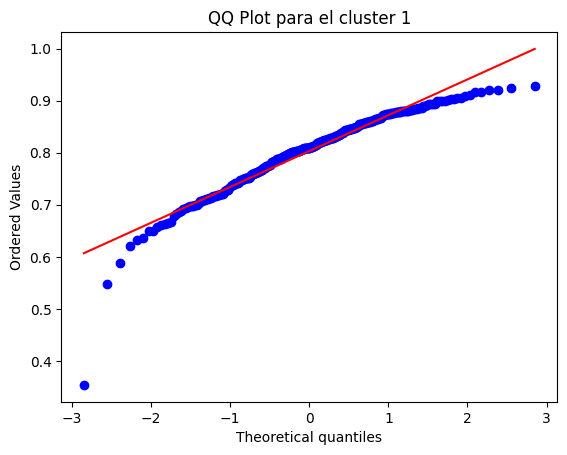

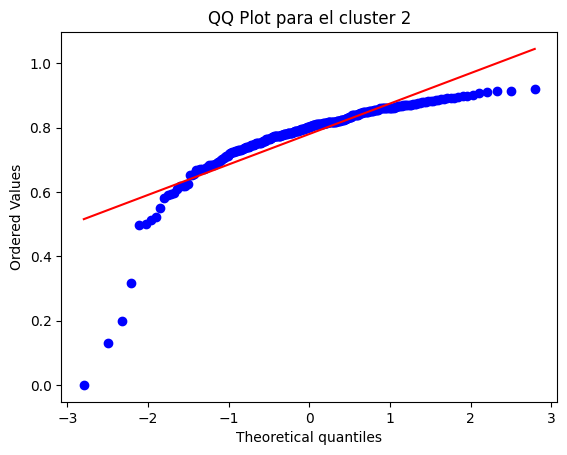

In [28]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# QQ plot para cluster 1
stats.probplot(cluster1_loudness, dist="norm", plot=plt)
plt.title("QQ Plot para el cluster 1")
plt.show()

# QQ plot para cluster 2
stats.probplot(cluster2_loudness, dist="norm", plot=plt)
plt.title("QQ Plot para el cluster 2")
plt.show()

In [88]:
stat, p = stats.levene(cluster1_loudness, cluster2_loudness)
print(f"Test de Levene para loudness: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para loudness: Estadístico=22.471, p-valor=0.000


In [89]:
# Test de Kruskal-Wallis para comparar loudness entre los clusters
stat, p = stats.kruskal(cluster1_loudness, cluster2_loudness)
print(f"Test de Kruskal-Wallis para loudness: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en Loudness entre el cluster 1 y 2.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en Loudness entre el cluster 1 y 2.")

Test de Kruskal-Wallis para loudness: Estadístico=126.782, p-valor=0.000
Se rechaza la hipótesis nula.
Existe una diferencia significativa en Loudness entre el cluster 1 y 2.


    Junto con el boxplot, podríamos decir que el clúster 1 tiene valores de loudness mayores que el clúster 2.

H4. Las canciones de modalidad mayor se asocian a valence mayor 


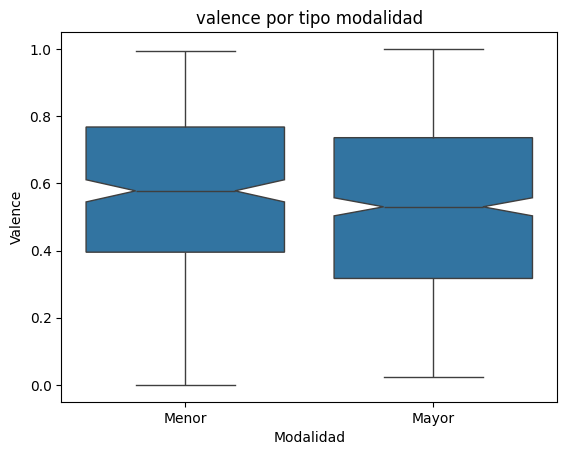

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Mode', y='Valence', data = copi_dataset, notch=True)
plt.title("valence por tipo modalidad")
plt.xlabel("Modalidad")
plt.xticks(ticks=[0, 1], labels=["Menor", "Mayor"])
plt.ylabel("Valence")
plt.show()

In [30]:
from scipy.stats import shapiro
#Separamos los datos en dos grupos, modalidad alta y baja
alta_valence = copi_dataset[copi_dataset['Mode'] == 1]['Valence']
baja_valence = copi_dataset[copi_dataset['Mode'] == 0]['Valence']

# Test de Shapiro-Wilk para modalidad de las cancioes
stat, p = shapiro(alta_valence)
print(f"Test de Shapiro-Wilk para modalidad alta: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Shapiro-Wilk para la modalidad de las canciones
stat, p = shapiro(baja_valence)
print(f"Test de Shapiro-Wilk para modalidad baja: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para modalidad alta: Estadístico=0.971, p-valor=0.000
Test de Shapiro-Wilk para modalidad baja: Estadístico=0.976, p-valor=0.000


    Vemos el QQ plot para la normalidad

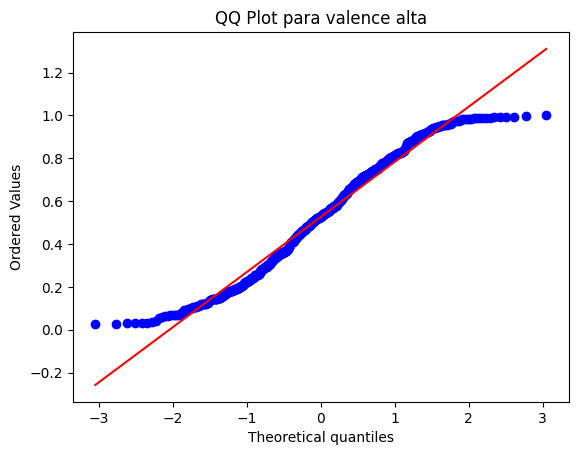

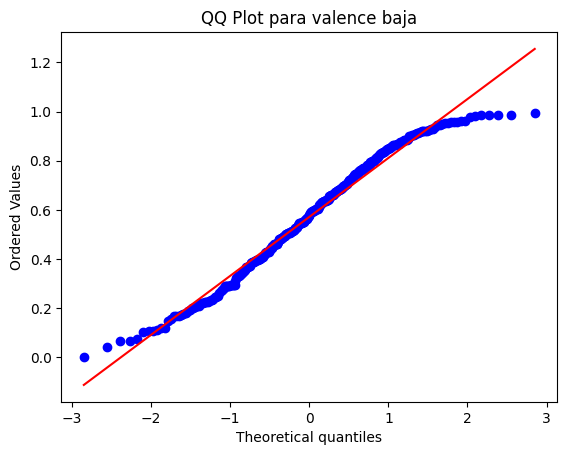

In [31]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# QQ plot para valence alta
stats.probplot(alta_valence, dist="norm", plot=plt)
plt.title("QQ Plot para valence alta")
plt.show()

# QQ plot para valence baja
stats.probplot(baja_valence, dist="norm", plot=plt)
plt.title("QQ Plot para valence baja")
plt.show()

In [92]:
stat, p = stats.levene(alta_valence, baja_valence)
print(f"Test de Levene para valence: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene para valence: Estadístico=3.123, p-valor=0.078


In [93]:
# Test de Kruskal-Wallis para comparar la energía entre las modalidades de las canciones
stat, p = stats.kruskal(alta_valence, baja_valence)
print(f"Test de Kruskal-Wallis para valence: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en la valenvce entre la modalidad mayor y menor.")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en la valence entre la modalidad mayor y menor.")

Test de Kruskal-Wallis para valence: Estadístico=5.756, p-valor=0.016
Se rechaza la hipótesis nula.
Existe una diferencia significativa en la valence entre la modalidad mayor y menor.
